# Protocol Benchmarks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from functools import *
from glob import glob as list_files
from pathlib import Path
import re

Formatting Stuff

In [2]:
prop_cycle = plt.rcParams['axes.prop_cycle']
mptcolors = prop_cycle.by_key()['color']
mptcolors[0]
colors = {'PRDT read': mptcolors[0], 'PRDT mixed': mptcolors[1], 'PRDT write': mptcolors[2], 'etcd read': mptcolors[3], 'etcd mixed': mptcolors[4], 'etcd write': mptcolors[5]}

from itertools import cycle
# solid, dotted, dashed, long dash with offsets, dashdotted, dashdotdotted
lines = ['solid',"dotted", "dashed"]
linecycler = cycle(lines)
linestyle = {'PRDT read': next(linecycler), 'PRDT mixed': next(linecycler), 'PRDT write': next(linecycler), 'etcd read':next(linecycler), 'etcd mixed': next(linecycler), 'etcd write': next(linecycler)}
#mylabels = {'etcd client1 cluster3 mixed 20_120': 'ARDT read', 'ARDT mixed': 'ARDT mixed', 'ARDT put': 'ARDT write', 'etcd get': 'etcd read', 'etcd mixed': 'etcd mixed', 'etcd put': 'etcd write'}

In [3]:
def load_results(path):
    files = list_files(path)
    dfs = []
    for file in files:
        runId = Path(file).name
        system = Path(file).parent.parent.name
        df = pd.read_csv(file, delimiter=";", dtype={'latency': 'float64', 'send-time': 'float64', 'receive-time': 'float64'})
    
        params = runId.split('-')
        
        df["run_config"] = f"{params[0]} {params[1]} {params[2]} {params[3]}"
        try:
            df["num-clients"] = re.match("client(_?)([0-9])", params[0])[2]
        except:
            df["num-clients"] = "undefined"
        try:
            df["num-nodes"] = re.match("cluster(_?)([0-9])", params[1])[2]
        except:
            df["num-nodes"] = "undefined"
        df["mode"] = params[2]
        df["run_id"] = re.match("(.*)\\.csv", params[4])[1]
        df["run"] = runId
        df["system"] = system
        df["index"] = pd.Series(range(0, len(df)))
        df['receive-time'] = df['receive-time'] - df['send-time'].min()
        df['send-time'] = df['send-time'] - df['send-time'].min()
        dfs.append(df)
    
    df = pd.concat(dfs)
    df["latency"] = (df["latency"] / 1000)
    df['send-time'] = df['send-time'] / 1000
    df['receive-time'] = df['receive-time'] / 1000
    df["unit"] = "ms" # fix unit
    
    return df    

In [4]:
df = load_results("../oopsla-dist-results-sin/*/*/*.csv")
df

,name,op,args,send-time,receive-time,latency,unit,run_config,num-clients,num-nodes,mode,run_id,run,system,index
0,client1,put,key7 value7,0.000,497.157,497.156750,ms,client1 cluster3 mixed 0_300,1,3,mixed,id29029_run2,client1-cluster3-mixed-0_300-id29029_run2.csv,etcd,0
1,client1,get,key5,498.011,1003.259,505.248034,ms,client1 cluster3 mixed 0_300,1,3,mixed,id29029_run2,client1-cluster3-mixed-0_300-id29029_run2.csv,etcd,1
2,client1,put,key5 value5,1003.353,1500.583,497.229666,ms,client1 cluster3 mixed 0_300,1,3,mixed,id29029_run2,client1-cluster3-mixed-0_300-id29029_run2.csv,etcd,2
3,client1,put,key8 value8,1500.715,1997.860,497.144757,ms,client1 cluster3 mixed 0_300,1,3,mixed,id29029_run2,client1-cluster3-mixed-0_300-id29029_run2.csv,etcd,3
4,client1,get,key3,1997.965,2497.418,499.453274,ms,client1 cluster3 mixed 0_300,1,3,mixed,id29029_run2,client1-cluster3-mixed-0_300-id29029_run2.csv,etcd,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,client1,put,key589 value589,299443.372,299823.256,379.884175,ms,client1 cluster3 write 0_300,1,3,write,id32507_run2,client1-cluster3-write-0_300-id32507_run2.csv,pb,785
786,client1,put,key590 value590,299823.266,300203.184,379.918352,ms,client1 cluster3 write 0_300,1,3,write,id32507_run2,client1-cluster3-write-0_300-id32507_run2.csv,pb,786
787,client1,put,key591 value591,300203.194,300582.866,379.671207,ms,client1 cluster3 write 0_300,1,3,write,id32507_run2,client1-cluster3-write-0_300-id32507_run2.csv,pb,787
788,client1,put,key592 value592,300582.875,300964.939,382.063800,ms,client1 cluster3 write 0_300,1,3,write,id32507_run2,client1-cluster3-write-0_300-id32507_run2.csv,pb,788


In [5]:
# fix dataframe
df.loc[df['system'] == 'pb', 'system'] = 'PRDT'
df

,name,op,args,send-time,receive-time,latency,unit,run_config,num-clients,num-nodes,mode,run_id,run,system,index
0,client1,put,key7 value7,0.000,497.157,497.156750,ms,client1 cluster3 mixed 0_300,1,3,mixed,id29029_run2,client1-cluster3-mixed-0_300-id29029_run2.csv,etcd,0
1,client1,get,key5,498.011,1003.259,505.248034,ms,client1 cluster3 mixed 0_300,1,3,mixed,id29029_run2,client1-cluster3-mixed-0_300-id29029_run2.csv,etcd,1
2,client1,put,key5 value5,1003.353,1500.583,497.229666,ms,client1 cluster3 mixed 0_300,1,3,mixed,id29029_run2,client1-cluster3-mixed-0_300-id29029_run2.csv,etcd,2
3,client1,put,key8 value8,1500.715,1997.860,497.144757,ms,client1 cluster3 mixed 0_300,1,3,mixed,id29029_run2,client1-cluster3-mixed-0_300-id29029_run2.csv,etcd,3
4,client1,get,key3,1997.965,2497.418,499.453274,ms,client1 cluster3 mixed 0_300,1,3,mixed,id29029_run2,client1-cluster3-mixed-0_300-id29029_run2.csv,etcd,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785,client1,put,key589 value589,299443.372,299823.256,379.884175,ms,client1 cluster3 write 0_300,1,3,write,id32507_run2,client1-cluster3-write-0_300-id32507_run2.csv,PRDT,785
786,client1,put,key590 value590,299823.266,300203.184,379.918352,ms,client1 cluster3 write 0_300,1,3,write,id32507_run2,client1-cluster3-write-0_300-id32507_run2.csv,PRDT,786
787,client1,put,key591 value591,300203.194,300582.866,379.671207,ms,client1 cluster3 write 0_300,1,3,write,id32507_run2,client1-cluster3-write-0_300-id32507_run2.csv,PRDT,787
788,client1,put,key592 value592,300582.875,300964.939,382.063800,ms,client1 cluster3 write 0_300,1,3,write,id32507_run2,client1-cluster3-write-0_300-id32507_run2.csv,PRDT,788


## Latency Plotting

In [6]:
latency_df = df[['system', 'mode', 'latency', 'index', 'name']] \
    .groupby(['system', 'mode', 'index', 'name']) \
    .mean().reset_index().set_index('index')

In [7]:
#latency_df['latency'] = latency_df['latency'] / 130
latency_df

,system,mode,name,latency
index,,,,
0,PRDT,mixed,client1,381.092142
1,PRDT,mixed,client1,383.776906
2,PRDT,mixed,client1,381.128030
3,PRDT,mixed,client1,381.273902
4,PRDT,mixed,client1,380.789441
...,...,...,...,...
605,etcd,write,client1,495.357636
606,etcd,write,client1,495.030298
607,etcd,write,client1,495.722594


PRDT
mixed
read
write
etcd
mixed
read
write


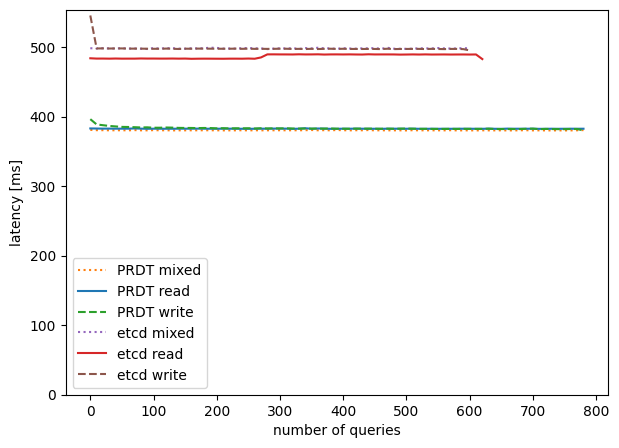

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))

def plot_latency(ax, label: str, df: pd.DataFrame, group_size):
    grouped_df = df.groupby({x: (x // group_size) * group_size for x in range(len(df))})
    mean_latency = grouped_df.mean()
    mean_latency.plot(y='latency', ax=ax, label=label, color=colors.get(label, 'pink'), linestyle=linestyle.get(label))
    


for system in latency_df['system'].unique():
    print(system)
    system_df = latency_df[latency_df['system'] == system]
    
    for mode in latency_df['mode'].unique():
        print(mode)
        run_df = system_df[system_df['mode'] == mode]
        plot_latency(ax, f"{system} {mode}", run_df[['latency']], 10)

ax.set_xlabel("number of queries")
ax.set_ylabel("latency [ms]")

ax.set_ylim([0, None])

#order = [3,4,5,2,1,0]
#ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
ax.legend()

plt.savefig(fname="latency-sin.png", format="png")
plt.savefig(fname="latency-sin.pdf", format="pdf")

PRDT
mixed
read
write
etcd
mixed
read
write


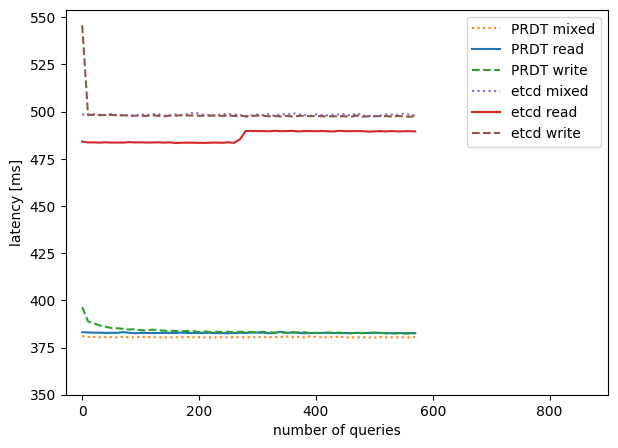

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))

def plot_latency(ax, label: str, df: pd.DataFrame, group_size):
    grouped_df = df.groupby({x: (x // group_size) * group_size for x in range(len(df))})
    mean_latency = grouped_df.mean()
    mean_latency[:58].plot(y='latency', ax=ax, label=label, color=colors.get(label, 'pink'), linestyle=linestyle.get(label))
    


for system in latency_df['system'].unique():
    print(system)
    system_df = latency_df[latency_df['system'] == system]
    
    for mode in latency_df['mode'].unique():
        print(mode)
        run_df = system_df[system_df['mode'] == mode]
        plot_latency(ax, f"{system} {mode}", run_df[['latency']], 10)

ax.set_xlabel("number of queries")
ax.set_ylabel("latency [ms]")

ax.set_ylim([350, None])
ax.set_xlim([None, 900])

#order = [3,4,5,2,1,0]
#ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
ax.legend()

plt.savefig(fname="latency-sin-zoomed.png", format="png")
plt.savefig(fname="latency-sin-zoomed.pdf", format="pdf")

In [10]:
for system in latency_df["system"].unique():
    sys_df = latency_df[latency_df.system == system]
    for mode in sys_df["mode"].unique():
            filtered_df = sys_df[(sys_df["mode"] == mode)]
            mean_latency = filtered_df["latency"].quantile(0.5)
            print(f"mean latency for {system} {mode}: {mean_latency}")

mean latency for PRDT mixed: 380.39757
mean latency for PRDT read: 382.6825965
mean latency for PRDT write: 382.84628475
mean latency for etcd mixed: 498.57000949999997
mean latency for etcd read: 489.2148945
mean latency for etcd write: 497.62155025


## Throughput Plotting

In [11]:
df["seconds"] = (df["receive-time"] / 1000).apply(round)
df["seconds"]

0        0
1        1
2        2
3        2
4        2
      ... 
785    300
786    300
787    301
788    301
789    301
Name: seconds, Length: 7800, dtype: int64

Mean Throughput for etcd client1 cluster3 mixed 0_300: 2.0
Mean Throughput for etcd client1 cluster3 read 0_300: 2.0
Mean Throughput for etcd client1 cluster3 write 0_300: 2.0
Mean Throughput for PRDT client1 cluster3 mixed 0_300: 2.5
Mean Throughput for PRDT client1 cluster3 read 0_300: 2.5
Mean Throughput for PRDT client1 cluster3 write 0_300: 2.5


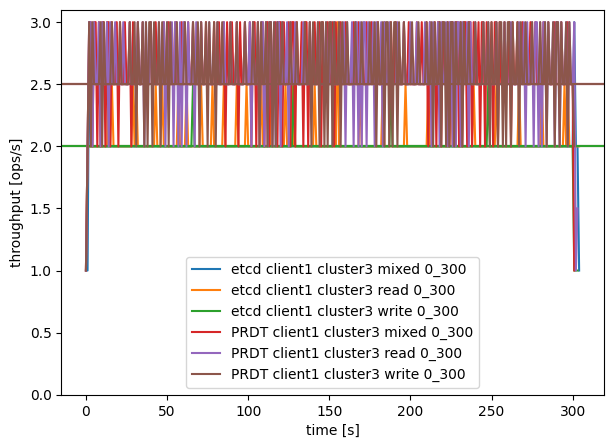

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))

res_data = []

for system in df['system'].unique():
    sys_df = df[df['system'] == system]
    
    for run_config in sys_df["run_config"].unique():
        filtered_df = sys_df[(sys_df["run_config"] == run_config)]
        
        throughput = filtered_df.groupby("seconds")["name"].count() / len(sys_df[sys_df['run_config'] == run_config]['run_id'].unique())
        throughput.plot(ax=ax, label=f"{system} {run_config}")
        mean_throughput = throughput.quantile(0.5)
        res_data.append([system, run_config, mean_throughput])
        print(f"Mean Throughput for {system} {run_config}: {mean_throughput}")
    
        # also_mean_throughput = filtered_df["name"].count() / filtered_df["seconds"].max()
        # print(f"Diff {mean_throughput - also_mean_throughput}")
        
        ax.axhline(y=mean_throughput, color=ax.get_lines()[-1].get_color())
        # ax.axhline(y=also_mean_throughput, color=ax.get_lines()[-1].get_color())

ax.legend()
ax.set_ylim(ymin=0)

ax.set_xlabel('time [s]')
ax.set_ylabel('throughput [ops/s]')

plt.savefig(fname="throughput.pdf", format="pdf")
plt.savefig(fname="throughput.png", format="png")

Mean Throughput for etcd mixed: 2.0
Mean Throughput for etcd read: 2.0
Mean Throughput for etcd write: 2.0
Mean Throughput for PRDT mixed: 2.5
Mean Throughput for PRDT read: 2.5
Mean Throughput for PRDT write: 2.5


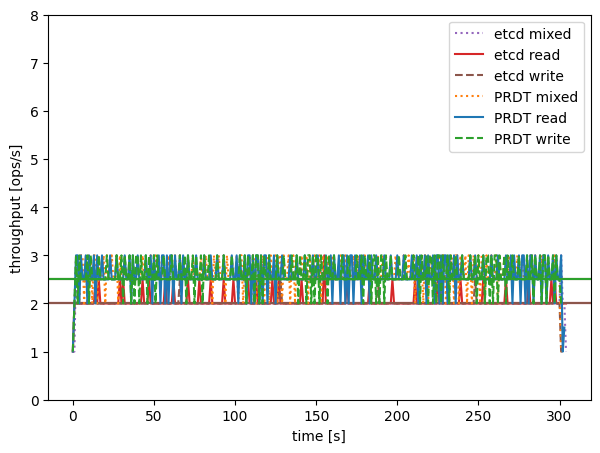

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))

res_data = []

for system in df['system'].unique():
    sys_df = df[df['system'] == system]
    
    for mode in sys_df["mode"].unique():
        filtered_df = sys_df[(sys_df["mode"] == mode)]
        
        throughput = filtered_df.groupby("seconds")["name"].count() / len(sys_df[sys_df['mode'] == mode]['run_id'].unique())
        label = f"{system} {mode}"
        mean_throughput = throughput.quantile(0.5)
        throughput.plot(ax=ax, label=label, color=colors.get(label, 'pink'), linestyle=linestyle.get(label))
        res_data.append([system, mode, mean_throughput])
        print(f"Mean Throughput for {system} {mode}: {mean_throughput}")
    
        #also_mean_throughput = filtered_df["name"].count() / filtered_df["seconds"].max()
        #print(f"Diff {mean_throughput - also_mean_throughput}")
        
        ax.axhline(y=mean_throughput, color=ax.get_lines()[-1].get_color())
        #ax.axhline(y=also_mean_throughput, color=ax.get_lines()[-1].get_color())

ax.legend()
ax.set_ylim(0,8)

ax.set_xlabel('time [s]')
ax.set_ylabel('throughput [ops/s]')

plt.savefig(fname="throughput-sin.pdf", format="pdf")
plt.savefig(fname="throughput-sin.png", format="png")

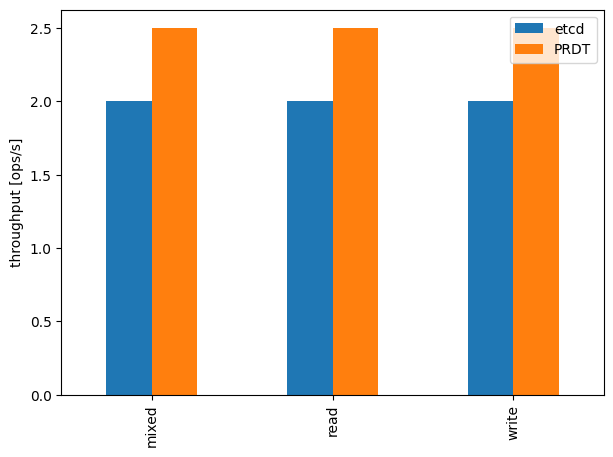

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))

res_df = pd.DataFrame(data=res_data, columns=['system', 'type', 'throughput'])

etcd_df = res_df[res_df.system == 'etcd'][['type', 'throughput']]
pb_df = res_df[res_df.system == 'PRDT'][['type', 'throughput']]

pd.DataFrame(data={'type': etcd_df.type, 'etcd': list(etcd_df.throughput), 'PRDT': list(pb_df.throughput)}).set_index('type').plot.bar(ax=ax)

ax.set_ylabel('throughput [ops/s]')
ax.set_xlabel('')

fig.savefig(fname="throughput_comp-sin.pdf", format="pdf")
fig.savefig(fname="throughput_comp-sin.png", format="png")

In [15]:
df.groupby(['system', 'run_config', 'run_id'])['send-time'].max() / 1000

system  run_config                    run_id      
PRDT    client1 cluster3 mixed 0_300  id32106_run1    299.730665
                                      id32106_run2    300.711453
        client1 cluster3 read 0_300   id32435_run1    303.016365
                                      id32435_run2    300.983058
        client1 cluster3 write 0_300  id32507_run1    300.286661
                                      id32507_run2    300.964949
etcd    client1 cluster3 mixed 0_300  id29029_run2    303.490931
        client1 cluster3 read 0_300   id7027_run1     303.690108
                                      id7027_run2     303.945074
        client1 cluster3 write 0_300  id15901_run1    302.525044
                                      id15901_run2    299.665892
Name: send-time, dtype: float64